<center><font size = "10"> Week 5 - Single Cell Electrophysiology <center>
<center><font size = "8">Homework<center>

# Ex 1. Protocols to study cell passive and active properties

<font size='3'>Use cell morphology files available in your group folder (.asc files) to perform cell stimulations according to protocols 1 and 2 below to help you characterise the cells' properties. 
For passive properties use the parameters from this week's tutorial 01. For active cell parameters use the MOD files available in this week's tutorial folder. Don't include any (active) biophysics on the cell axon.

What protocols could be used to study cells at the single-cell level ? Do you think protocols 1 and 2 are a good choice for characterising both passive and active properties of your cells, why or why not ? Explain. [1 pt]
#### Stimuli description
    
* Protocol 1: stimulation amplitude from -0.06 nA to 0.01 nA, increments of 0.005 nA.     
* Protocol 2: stimulation amplitude from 0.1 nA to 3 nA, increments of 0.8 nA. 


In [1]:
! nrnivmodl

/home/In Silico/Week 5/Homework
NaTs2_t.mod SK_E2.mod SKv3_1.mod
NaTs2_t.mod SK_E2.mod SKv3_1.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  NaTs2_t.lo SK_E2.lo SKv3_1.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libnrnmech.so .libs/libnrnmech.so.0 .libs/libnrnmech.so.0.0.0
libtool: link: gcc -shared  -fPIC -DPIC  .libs

In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h
import hoc
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer

In [3]:
# Import cell morphologies

# Define NEURON class with specific morphology and channel behavior

class NEURON_Ex1:
    def __init__(self, morph_path):
        self.build_morphology(morph_path)
        self.define_biophysics()
        
    def build_morphology(self, morph_path):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input(morph_path)

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

                # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        #self.axonal = [] # for the moment we will forget about the axon
        self.all = []
        for sec in h.allsec():
            #print (sec)
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.basal.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            #if 'axon' in sec.name():
            #    self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and the different types
        of ion channels on the soma and dendrites
        """
        # Define passive properties
        # You can try to change the passice properties and see what happens
        for sec in h.allsec():
            sec.Ra = 100
            sec.cm = 1
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75
                
        # Define active properties for soma and dendrites (basal and apical)
        for sec in self.somatic:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
          
        for sec in self.apical:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1
        
        for sec in self.basal:
            sec.insert('NaTs2_t')
            for seg in sec:
                seg.gNaTs2_tbar_NaTs2_t = 0.25 
            sec.insert('SK_E2')
            for seg in sec:
                seg.gSK_E2bar_SK_E2 = 0.01
            sec.insert('SKv3_1') 
            for seg in sec:
                seg.gSKv3_1bar_SKv3_1 = 0.1

In [4]:
# Instantiate the cell and giving passive and active properties
Cell1_g1 = NEURON_Ex1('Cell1_g1.asc')
Cell2_g1 = NEURON_Ex1('Cell2_g1.asc')


5771 lines read

Cell1_g1.asc problems


Main branch starting at line 31 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma

19847 lines read


In [5]:
# Defining the protocol 
protocol_1_amp = np.arange(-0.06, 0.01, 0.005)
protocol_2_amp = np.arange(0.1, 3, 0.8)

#### --> What protocols could be used to study cells at the single-cell level ?

In order to study cells at a single-cell level, one can pay attention to various aspects: a neuron's morphology, electrophysiology and genetic/molecular level.

In this particular exercise, we focusing on the electrophysiology properties of such cells.  On a single-cell level, what is most often done consists in patch-clamp experiments.  These can be voltage-clamped or current-clamped experiments, where either the membrane voltage is fixed and one looks at the flow of current, or the current is fixed and one focuses on the membrane potential evolution.

The voltage-clamped mode is used to measure voltage specific activity of an ionic channel, whereas the current-clamped mode measures change in membrane potential.

In order to take a closer look at the electric behavior of a neuron, one can perform different types of current-clamps protocols: short pulse impulse, step current, and ramp.  These different different types of current injection produce different types of behavior in the cell: indeed if the current is progressively injected and for smaller amplitudes, the cell remains in a sub-threshold behavior and thus does not fire any action potential.  On the other hand, if the injected current is stronger, the cell may cross the action potential threshold and fire action potentials, and can even enter a state of repetitive action potential firing.

Other protocols exist, as mentionned in the article ["Single Cell Electrical Characterization Techniques"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4490468/):
- Nanoprobe
- Microfluidics Platforms (lithography)
- Electrorotation
- Impedance Flow Cytometry
- Micro Electrical Impedance Spectroscopy (µ-EIS)


#### --> Looking at Cell 1

In [12]:
# Protocol 1

fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_1_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

NEURON: n >= 0.
 near line 0
 ^
        IClamp(...)


RuntimeError: hoc error

In [ ]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(15,3))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,3))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_2_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell1_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell1_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

#### --> Looking at Cell 2

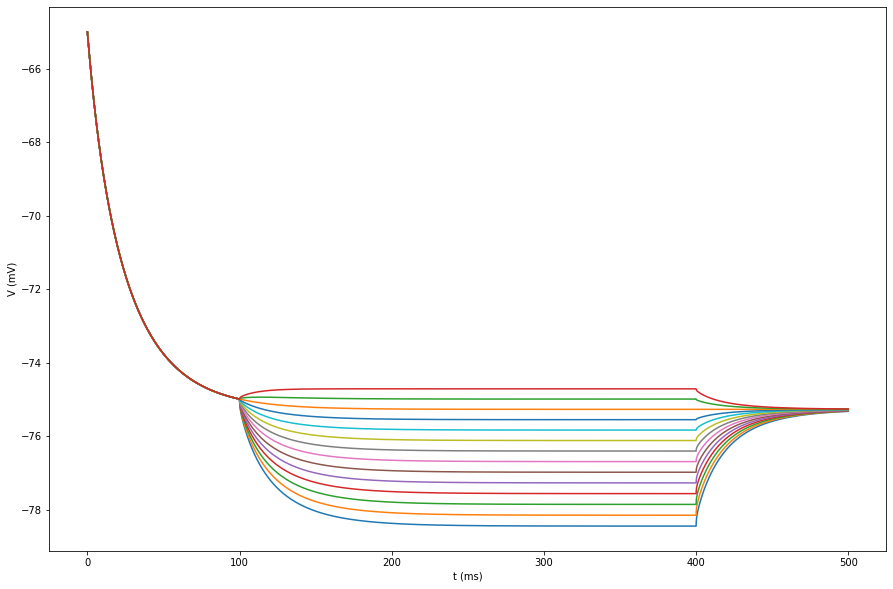

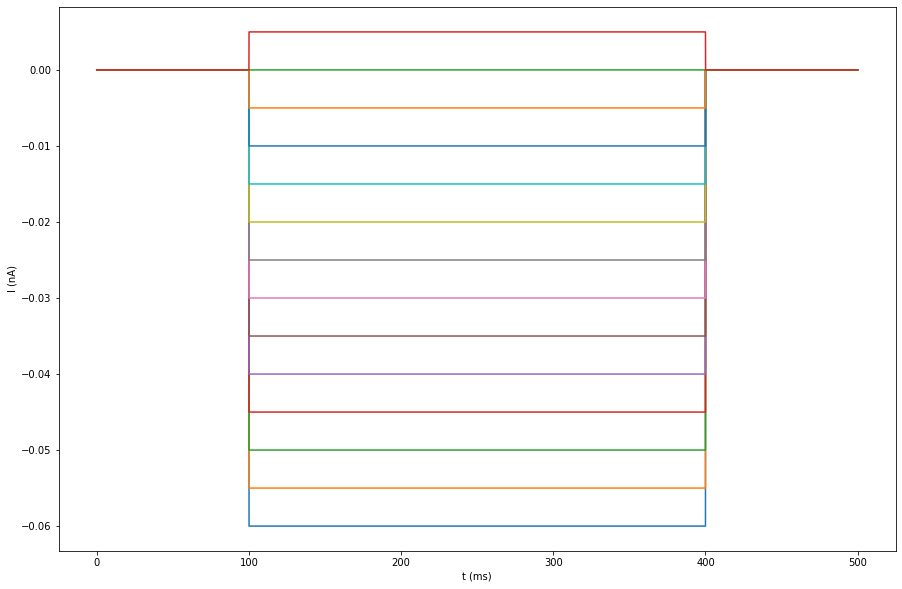

In [15]:
# Protocol 1

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_1_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

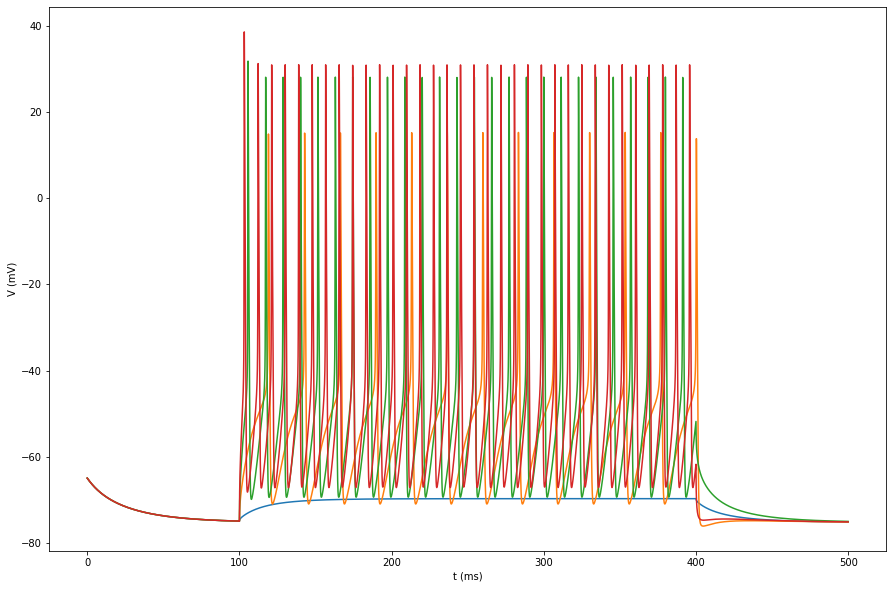

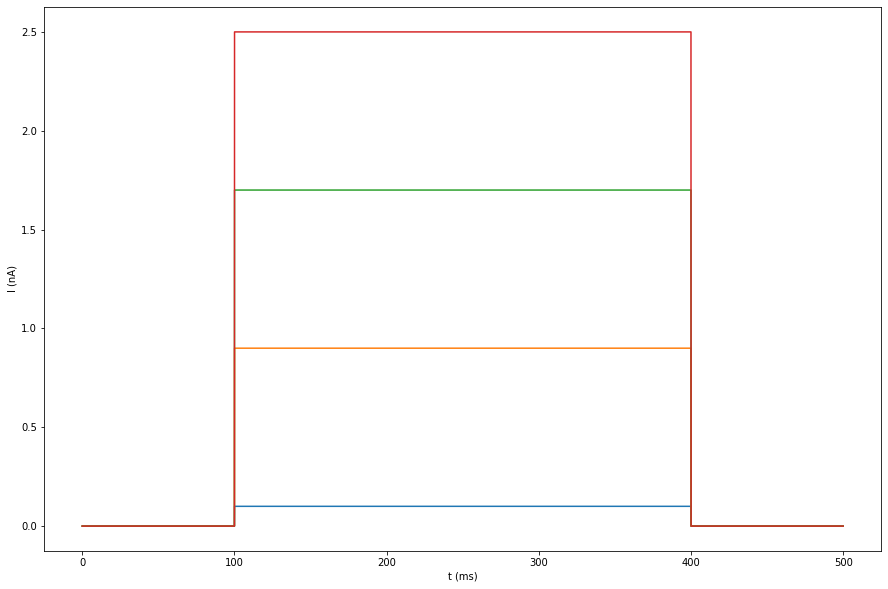

In [16]:
# Protocol 2

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xlabel = 't (ms)', ylabel = 'V (mV)')

fig2, ax2 = plt.subplots(figsize=(15,10))
ax2.set(xlabel = 't (ms)', ylabel = 'I (nA)')

# Stimulation
for amp in protocol_2_amp:  
    # Place a stimulation electrode in the middle of the soma
    stim = h.IClamp(Cell2_g1.somatic[0](0.5))         
    stim.delay = 100   # stim delay (ms)
    stim.dur = 300     # stim duration (ms)
    stim.amp = amp    # stim amplitude (nA)    
    # Initialize NEURON vectors to record time, voltage and current
    # time vector
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # membrame potential vector
    rec_v_soma = h.Vector()
    rec_v_soma.record(Cell2_g1.somatic[0](0.5)._ref_v)
    # current
    rec_i = h.Vector()
    rec_i.record(stim._ref_i)

    # Initialize and run a simulation
    h.load_file('stdrun.hoc')
    h.finitialize(-65)
    h.continuerun(500)
    
    ax1.plot(rec_t, rec_v_soma)
    ax2.plot(rec_t, rec_i)

#### --> Do you think protocols 1 and 2 are a good choice for characterising both passive and active properties of your cells, why or why not ? Explain.



Protocol 1 seeks to inject current from -0,06 to 0,01 nA).  This small variation allows the cell to remain in a subthreshold behavior and not fire any action potential.  This protocol is useful in the sense that it allows us to remain in the subthreshold behavior and thus analyze the passive membrane properties.  Indeed, when injecting small currents, one can for example directly measure the $\tau$ time scale and the membrane resistance.

One can note in the plots above the exponential decrease when the protocol 1 currents are injected. Moreover, the inital decrease is due to the fact that the starting potential of the stimulation is at -65 mV, while the resting membrane potential is set at -75 in the NEURON_EX1 class (and we see for both protocol 1 and 2 that the membrane returns to this resting state after stimulation).

On the other hand, protocol 2 fires stronger currents (from 0.1 to 3 nA).  This protocol enables the cell to enter into a supra-threshold behavior and fire action potentials.  Depending on the current injected it can also enter into a repetitive firing rate.  This type of protocol is efficient to study the active properties of the cell, and note different features such as the action potential amplitude, the action potential width, the firing frequency, the inter-spike interval, the refractory period, if it is an adaptive neuron...


# Ex 2. Analysing real single cell voltage traces from patch-clamp experiments

<font size='3'>Find the time to first spike, spikecount and the coefficient of variation of the interspike interval (ISI) from the recordings in your folder group (.dat files). Plot all recordings, then extract the above features from one or several stimulation protocols that you think you can extract the features from using your method of choice - eFEL, scipy.signal or your own custom code. [1.5 pts]

#### Traces description

* The files are named with: stimuli type (e.g. "APWaveform", "FirePattern", "IV"). 
* Sweep (repetition) number: (e.g. "APWaveform_46-51"), of increasing/decreasing amplitudes.
* Note that we have pairs of recordings with the same trace number (e.g. "exp_APWaveform_ch7_51.dat" and "exp_APWaveform_ch6_51.dat"). One of them contains the current stimulus (in this case "*ch7*") and the other the voltage response (in this case "*ch6*").

####  --> Find the time to first spike, spikecount and the coefficient of variation of the interspike interval (ISI) from the recordings in your folder group

####  --> Plot all recordings

####  --> Extract the above features from one or several stimulation protocols that you think you can extract the features from

# Ex 3. Combine Ex 1 and Ex 2

<font size='3'> Now let's do some electrophysiological analysis on both cells from your group folder that you have used in exercise 1. Examine your plots for protocols 1 and 2 (from exercise 1 again) and select 2 or 3 eFeatures to help you identify differences between your two cells. Would you be able to classify the cells based on these eFeatures ? Explain your choice of features and your observations. [1.5 pts]


####  --> Examine your plots for protocols 1 and 2 (from exercise 1 again) and select 2 or 3 eFeatures to help you identify differences between your two cells

When taking a look at the eFEL documentation, several eFeatures stand out and prove useful to classify our cells from the two protocols implemented in exercise 1.

For protocol 1 where the cell remains in subthreshold activity, interesting features to take a look at would be:
- voltage deflection
- decay time constant after stimulation

As for protocol 2 where the cell enters supra-threshold activity, the interesting features to take a look at would be:
- mean frequency
- coefficient of variation of ISI
- decay time constant
- time to first spike
- checking the AP initiation with AIS
- burst number
- the width of a spike at half-width amplitude, or the width of the spike at threshold

When looking at both of our cells however, we can narrow down our eFeatures to 2-3 to identify the differences between our two cells:
- eFeature 1
- eFeature 2
- eFeature 3

Indeed, 

<font size='3'><font color='red'>  - GIVE EXPLANATION AS TO HOW THESE THREE FEATURES HELP US DISTINGUISH BETWEEN CELL 1 AND CELL 2

<font size='3'><font color='red'>  - EXPLAIN WHY WE CHOSE THESE THREE FEATURES

In [18]:
# Obtaining eFeatures by doing code similar to exercise 2


####  --> Would you be able to classify the cells based on these eFeatures?

One could resort to using the Petilla classification to try to place these two cells according to their characteristics.  However, one must note that the classification is not as clear-cut.  Indeed, these two cells could belong to the extremes of a gradient of a same cell class.  To be able to classify them more precisely, one should resort to experimenting more in order to place these two cells correctly into clusters.


<font size='3'><font color='red'>  CHECK IF THIS STILL APPLIES AND/OR COME UP WITH A BETTER EXPLANATION

# Ex 4. Genetic Algorithm (Optimization)

<font size='3'>Change the GA code in such a way that instead of spike count, we search for a solution for time from the start of the stimulus to the maximum of the first peak using stim_amp = 0.1 nA and stim_amp = 0.9 nA.
    
<font size='3'>As you can see the optimization algoithm explained in the tutorial is too simple and it gives a lot of possible solutions. Find a third data point for time_to_first_spike and rerun the GA algorithm now using 3 instead of 2 goals. Does this help improve your results ? Explain what other modifications you could introduce, so the number of solutions gets better constrained. [2 pts]
    